In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import integrate
from scipy.integrate import solve_ivp
import locale
import matplotlib.ticker as ticker

In [2]:
plt.rc('text', usetex = True)
plt.rc('font', **{'family' : "sans-serif"})
params = {'text.latex.preamble' : [r'\usepackage{amsmath}']}
plt.rcParams.update(params)
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

# locale.setlocale(locale.LC_NUMERIC, "de_DE.UTF-8")
# plt.rcdefaults()

In [3]:
def funciones(xi,y, sigma, n, h):
    psi_,eta_,psi1_,eta1_ = y
    dydxi = [h*(eta_ + sigma*xi**(3)*psi_**(n+1))*((1 - n*sigma) + (n+1)*sigma*psi_)/xi/(2*(n+1)*sigma*eta_ - xi)
           ,xi**(2)*psi_**(n)*(1 - n*sigma + n*sigma*psi_) 
           ,h*(((eta1_ + 3*sigma*xi**(2)*psi_**(n+1) + sigma*xi**(3)*(n+1)*psi_**(n)*psi1_)*((1 - n*sigma) + (n + 1)*sigma*psi_)/xi/(2*(n+1)*sigma*eta_ - xi)) + (sigma*(n+1)*psi1_)*(eta_ + sigma*xi**(3)*psi_**(n+1))/xi/(2*(n+1)*sigma*eta_ - xi)  -  (((1 - n*sigma) + (n + 1)*sigma*psi_)*(eta_ + sigma*xi**(3)*psi_**(n+1))/xi**(2)/(2*(n+1)*sigma*eta_ - xi) )  -  (((1 - n*sigma) + (n + 1)*sigma*psi_)*(eta_ + sigma*xi**(3)*psi_**(n+1))*(2*(n+1)*sigma*eta1_ - 1)/xi/((2*(n+1)*sigma*eta_ - xi)**(2))))         
           ,(2*xi*psi_**(n) + n*xi**(2)*psi_**(n-1)*psi1_)*(1 - n*sigma + n*sigma* psi_) + xi**(2)*psi_**(n)*n*sigma*psi1_]
    return dydxi

In [4]:
c = 2.997*10**(8)          # Velocidad de la luz en S.I.
G = 6.673*10**(-11)        # Constante de gravitación universal en S.I.
Msun = 1.989*10**(30)      # Masa solar en S.I.

In [5]:
C = 1/8                  # Valor de C para anisotropía

h = 1 - 2*C

sigma = 0.25

rho_c = 1.5*10**(18)

# n: índice polítropo
Lista_n = [0.5,1.0,1.5,2.0]#,2.5,3.0,3.5,4.0]

In [6]:
Lista_Modelos = []

In [7]:
%%time

for i in range(len(Lista_n)):
    
    n = Lista_n[i]
    
    # Condiciones iniciales
    Psi0 = 1.0
    Eta0 = 0.0
    Psi10 = 0.0
    Eta10 = 0.0
    
    y0 = [Psi0,Eta0,Psi10,Eta10]

    def stop_condition(xi,y,sigma,n,h):
        return y[0] - 10**-15
    
    stop_condition.terminal = True
    
    xi0 = 10**(-15)
    ximax = 1000
    
    xi_span = (xi0,ximax)
        
    soluciones = solve_ivp(funciones,xi_span,y0,method='RK45',events=stop_condition,
                           args=(sigma,n,h),dense_output=True,max_step=1/50)
    
    if soluciones.status == 0:
        print ("insuficiente intervalo de integración xi por favor auméntelo")
        continue
    else:
        Psi = soluciones.y[0]
        Eta = soluciones.y[1]
        Psi1 = soluciones.y[2]
        Eta1 = soluciones.y[3]
        xi = soluciones.t
    
    PNorm = Psi**(n+1)
    
    # Xi normalizada
    xiNorm = xi/xi[-1]
        
    Densidad = Psi**(n)
    
    # Presión tangencial
    PTNorm = (C*(n+1)*(Eta + sigma*Psi**(n+1)*xi**(3))/(xi - 2*Eta*sigma*(n+1)))*((1 - n*sigma)*Psi**(n) + (n+1)*sigma*Psi**(n+1)) + Psi**(n+1)
     
    m = (c**(2)*sigma*(n+1)/(4*np.pi*rho_c)**(1/3)/G)**(3/2)*Eta/Msun   # Masa en unidades de masa solar
    mM = m/m[-1]
    
    e2lambda = (1 - 2*sigma*Eta*(n+1)/xi)
    
    e2nu = (1 + sigma*(n+1)*Psi/(1 - sigma*n))**(-2/h)*(1 - 2*(n+1)*sigma*Eta[-1]/xi[-1])
    
    Lista_Modelos.append([xiNorm, Densidad, PNorm, PTNorm, mM, e2lambda, e2nu])

C:\Users\DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
C:\Users\DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


Wall time: 700 ms


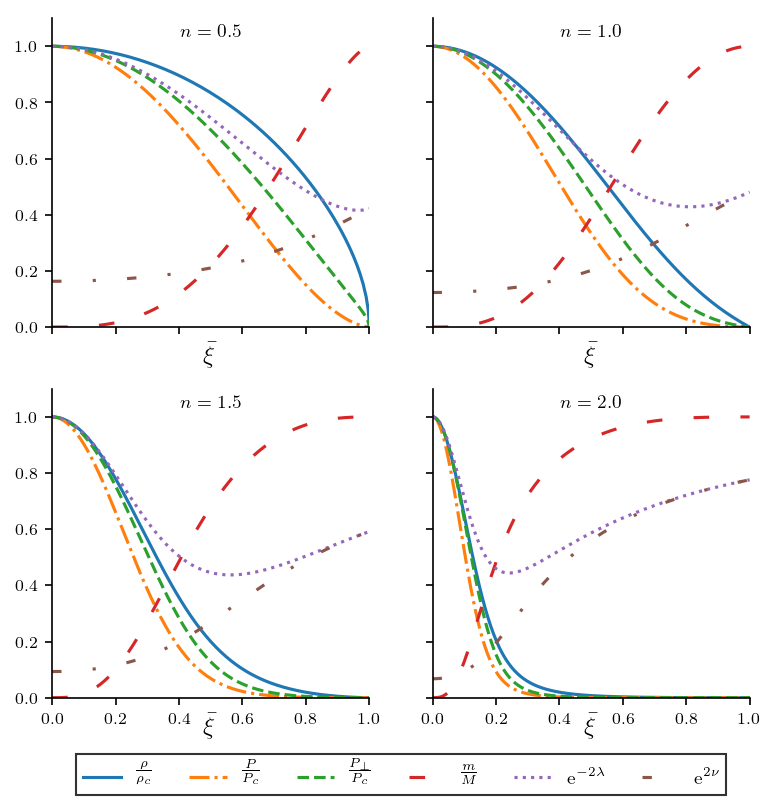

In [8]:
axes = ()

fig, axes = plt.subplots(nrows=2,ncols=2,sharey=True,sharex=True,figsize=(6,6),dpi=150)

Labels = [r'$\frac{\rho}{\rho_{c}}$',r'$\frac{P}{P_{c}}$',r'$\frac{P_{\perp}}{P_{c}}$',r'$\frac{m}{M}$',
        r'$\mathrm{e}^{- 2 \lambda}$',r'$\mathrm{e}^{2 \nu}$']

Line_Styles = ['-','-.','--',(0,(5,10)),':',(0,(3,10,1,10))]


ax = [axes[0][0],axes[0][1],axes[1][0],axes[1][1]]


for i in range(len(ax)):
    
    for j in range(1,len(Lista_Modelos[0])):
        
        ax[i].plot(Lista_Modelos[i][0],Lista_Modelos[i][j],'-',label=Labels[j-1],linestyle=Line_Styles[j-1])
        ax[i].set_xbound(0.0,1.0)
        ax[i].set_ybound(0.0,1.1)
        ax[i].set_xlabel(r'$\bar{\xi}$',fontsize=12)
        ax[i].xaxis.set_label_coords(0.5, -0.05)
        ax[i].set_title(r'$n = {}$'.format(Lista_n[i]),x=0.5,y=0.9,fontsize=9)
        ax[i].spines['right'].set_color('none')
        ax[i].spines['top'].set_color('none')
#         ax[i].xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:#.2n}'))
#         ax[i].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:#.2n}'))
    
ax[3].legend(ncol=6,loc=(-1.125,-0.315),edgecolor='k',fancybox=False,fontsize=9)


plt.show()